# ***Lead Scoring Case Study***

In [1]:
# Importing Required Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Uploading and reading Dataset
pd.set_option("display.max_columns", 500)
lead = pd.read_csv("Leads.csv")

lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Info of dataset
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [4]:
# Null values in the Dataset
round((lead.isnull().sum()/len(lead))*100,4)

Prospect ID                                       0.0000
Lead Number                                       0.0000
Lead Origin                                       0.0000
Lead Source                                       0.3896
Do Not Email                                      0.0000
Do Not Call                                       0.0000
Converted                                         0.0000
TotalVisits                                       1.4827
Total Time Spent on Website                       0.0000
Page Views Per Visit                              1.4827
Last Activity                                     1.1147
Country                                          26.6342
Specialization                                   15.5628
How did you hear about X Education               23.8853
What is your current occupation                  29.1126
What matters most to you in choosing a course    29.3182
Search                                            0.0000
Magazine                       

In [5]:
# Description of numerical values of Dataset
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


From the above description we can impute the features "Asymmetrique Activity Score" and "Asymmetrique Profile Score" with median

In [6]:
# Checking Unique values/categories of Categorical Features
numerics = ['int64','float64']
col = list(lead.select_dtypes(exclude=numerics).columns)
col.remove('Prospect ID')
df_cat = lead[col]

for i in df_cat:
    print(df_cat[i].value_counts())

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
NC_EDM                  1
welearnblog_Home        1
blog                    1
youtubechannel          1
WeLearn                 1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64
No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page V

Select is treated as null values because it is the specific information by the user which is left unfilled and so it is reffered as null value

Categorical features to remove with NaN and Select values combined are:
- Lead Profile
- City
- How did you hear about X Education
- Specialization
- Lead Quality
- Tags

Other Features to remove with only one category because correlation = cov(x1,x2)/(var(x1)var(x2)), here variance of one column will be zero so correlation cannot be calculated
- Update me on Supply Chain Content
- Get Updates on DM content 
- I agree to pay the amount through cheque
- Receive More Updates About Our Courses
- Magazine

In [7]:
# Dropping columns that have mentioned above
cols = ["Lead Profile", "City", "How did you hear about X Education", "Specialization", "Lead Quality", "Tags", 
        "Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque",
        "Receive More Updates About Our Courses", "Magazine"]

df1 = lead.drop(cols, axis=1)
df1.shape


(9240, 26)

In [8]:
# Looking at the dataset
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,02.Medium,01.High,15.0,18.0,No,Modified


In [9]:
# Again checking null values in the Dataset
round((df1.isnull().sum()/len(df1))*100, 4)

Prospect ID                                       0.0000
Lead Number                                       0.0000
Lead Origin                                       0.0000
Lead Source                                       0.3896
Do Not Email                                      0.0000
Do Not Call                                       0.0000
Converted                                         0.0000
TotalVisits                                       1.4827
Total Time Spent on Website                       0.0000
Page Views Per Visit                              1.4827
Last Activity                                     1.1147
Country                                          26.6342
What is your current occupation                  29.1126
What matters most to you in choosing a course    29.3182
Search                                            0.0000
Newspaper Article                                 0.0000
X Education Forums                                0.0000
Newspaper                      

In [10]:
# Dropping features with high null values 
df1 = df1.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
                'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)
df1.shape

(9240, 22)

In [11]:
# Again checking the null values percentage
round((df1.isnull().sum()/len(df1))*100,4)

Prospect ID                                       0.0000
Lead Number                                       0.0000
Lead Origin                                       0.0000
Lead Source                                       0.3896
Do Not Email                                      0.0000
Do Not Call                                       0.0000
Converted                                         0.0000
TotalVisits                                       1.4827
Total Time Spent on Website                       0.0000
Page Views Per Visit                              1.4827
Last Activity                                     1.1147
Country                                          26.6342
What is your current occupation                  29.1126
What matters most to you in choosing a course    29.3182
Search                                            0.0000
Newspaper Article                                 0.0000
X Education Forums                                0.0000
Newspaper                      

In [12]:
# For Remaining categorical variables with missing values we can use mode imputation
df1['Country'] = df1['Country'].fillna("India")
df1['What is your current occupation'] = df1['What is your current occupation'].fillna("Unemployed")
df1['What matters most to you in choosing a course'] = df1['What matters most to you in choosing a course'].fillna("Better Career Prospects")

# Dropping the remaining missing values from the dataset
df1 = df1.dropna()
df1 = df1.drop(['Prospect ID', 'Lead Number'], axis=1)
# Shape of the dataframe
df1.shape

(9074, 20)

In [13]:
# Again check on the value counts of the dataset
numerics = ['int64','float64']
col = list(df1.select_dtypes(exclude=numerics).columns)
df_cat = df1[col]

for i in df_cat:
    print(df_cat[i].value_counts())

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
NC_EDM                  1
welearnblog_Home        1
blog                    1
youtubechannel          1
WeLearn                 1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64
No     8358
Yes     716
Name: Do Not Email, dtype: int64
No     9072
Yes       2
Name: Do Not Call, dtype: int64
Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
C

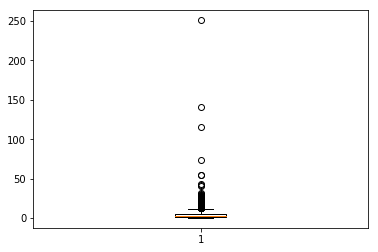

In [14]:
# Outliers Detection and treatment
plt.boxplot(df1['TotalVisits'])
plt.show()

Q1 = df1['TotalVisits'].quantile(0.05)
Q3 = df1['TotalVisits'].quantile(0.95)

iqr= Q3-Q1

df1 = df1[(df1["TotalVisits"]>=Q1) & (df1["TotalVisits"]<=Q3)]

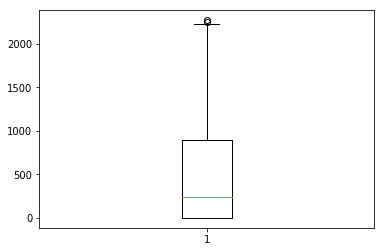

In [15]:
plt.boxplot(df1['Total Time Spent on Website'])
plt.show()

Q1 = df1['Total Time Spent on Website'].quantile(0.05)
Q3 = df1['Total Time Spent on Website'].quantile(0.95)

iqr= Q3-Q1

df1 = df1[(df1["Total Time Spent on Website"]>=Q1) & (df1["Total Time Spent on Website"]<=Q3)]

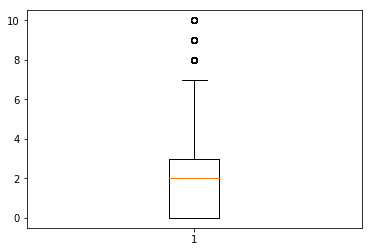

In [16]:
plt.boxplot(df1['Page Views Per Visit'])
plt.show()

Q1 = df1['Page Views Per Visit'].quantile(0.05)
Q3 = df1['Page Views Per Visit'].quantile(0.95)

iqr= Q3-Q1

df1 = df1[(df1["Page Views Per Visit"]>=Q1) & (df1["Page Views Per Visit"]<=Q3)]

In [17]:
df1.shape

(8027, 20)

In [18]:
# Again checking the Unique values 
numerics = ['int64','float64']
col = list(df1.select_dtypes(exclude=numerics).columns)
df_cat = df1[col]

for i in df_cat:
    print(df_cat[i].value_counts())

Landing Page Submission    4111
API                        3319
Lead Add Form               568
Lead Import                  29
Name: Lead Origin, dtype: int64
Google               2521
Direct Traffic       2192
Olark Chat           1732
Organic Search        869
Reference             433
Welingak Website      128
Referral Sites         96
Facebook               30
bing                    6
google                  5
Click2call              3
Live Chat               2
Social Media            2
Pay per Click Ads       1
blog                    1
youtubechannel          1
WeLearn                 1
NC_EDM                  1
welearnblog_Home        1
testone                 1
Press_Release           1
Name: Lead Source, dtype: int64
No     7401
Yes     626
Name: Do Not Email, dtype: int64
No     8025
Yes       2
Name: Do Not Call, dtype: int64
Email Opened                    3028
SMS Sent                        2376
Olark Chat Conversation          924
Page Visited on Website          486
C

In [19]:
# Again Dropping the columns with only one category 

df1 = df1.drop(['Newspaper Article', 'X Education Forums', 'Newspaper'],axis=1)
df1.shape

(8027, 17)

In [20]:
df1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Better Career Prospects,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,Modified


## EDA

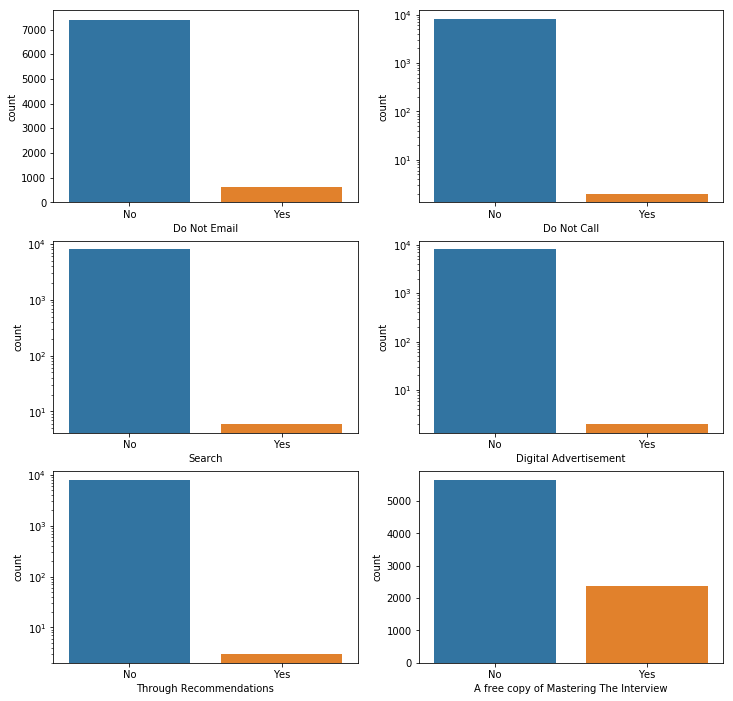

In [21]:
plt.figure(figsize=(12,12))

plt.subplot(3,2,1)
sns.countplot(x='Do Not Email', data=df1)

plt.subplot(3,2,2)
sns.countplot(x='Do Not Call', data=df1)
plt.yscale('log')

plt.subplot(3,2,3)
sns.countplot(x='Search', data=df1)
plt.yscale('log')

plt.subplot(3,2,4)
sns.countplot(x='Digital Advertisement', data=df1)
plt.yscale('log')

plt.subplot(3,2,5)
sns.countplot(x='Through Recommendations', data=df1)
plt.yscale('log')

plt.subplot(3,2,6)
sns.countplot(x='A free copy of Mastering The Interview', data=df1)

plt.show()

[]

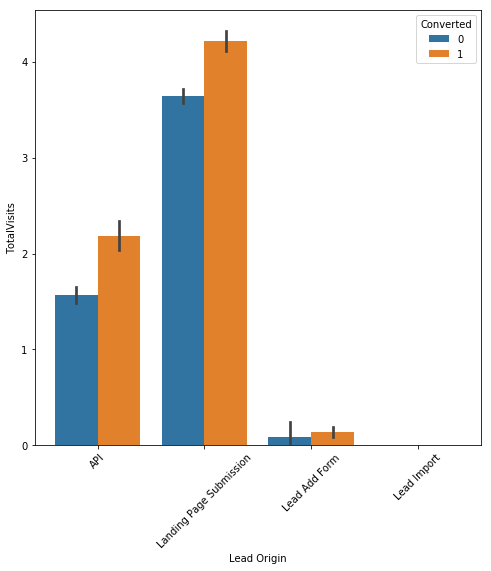

In [22]:
plt.figure(figsize=(8,8))
sns.barplot(x='Lead Origin', y='TotalVisits', hue='Converted', data=df1)
plt.xticks(rotation=45)
plt.plot()

In [23]:
df1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Better Career Prospects,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,Modified


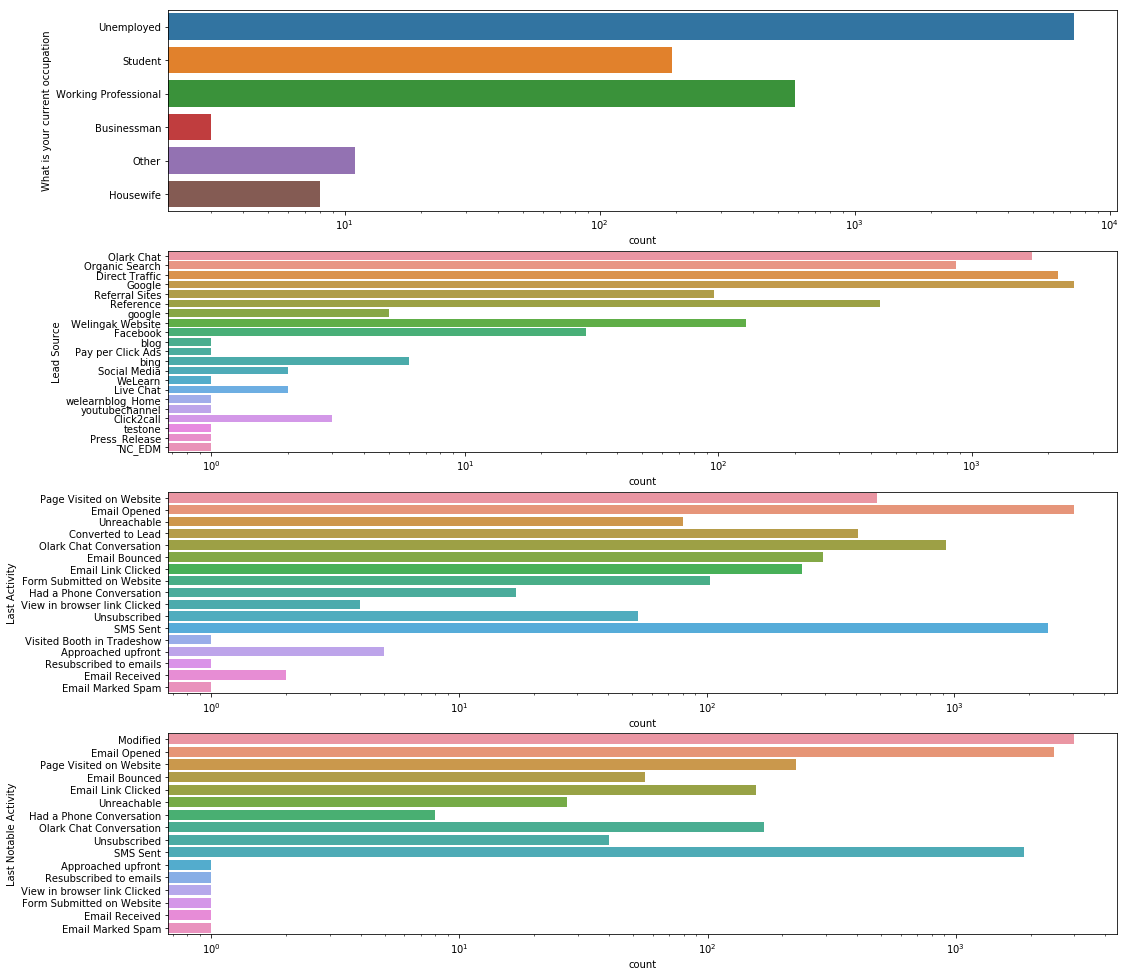

In [24]:
# Countplots
plt.figure(figsize=(17,17))

plt.subplot(4,1,1)
sns.countplot(y='What is your current occupation', data=df1)
plt.xscale("log")

plt.subplot(4,1,2)
sns.countplot(y='Lead Source', data=df1)
plt.xscale("log")

plt.subplot(4,1,3)
sns.countplot(y='Last Activity', data=df1)
plt.xscale("log")

plt.subplot(4,1,4)
sns.countplot(y='Last Notable Activity', data=df1)
plt.xscale("log")

plt.show()

In [25]:
df1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Better Career Prospects,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,Modified


## Data Prepration For Model

In [26]:
# Data Prepration for Model Building
le = LabelEncoder()
cols = ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

df1[cols] = df1[cols].apply(le.fit_transform)

df1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Better Career Prospects,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,0,0,0,0,Modified


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8027 entries, 0 to 9239
Data columns (total 17 columns):
Lead Origin                                      8027 non-null object
Lead Source                                      8027 non-null object
Do Not Email                                     8027 non-null int32
Do Not Call                                      8027 non-null int32
Converted                                        8027 non-null int64
TotalVisits                                      8027 non-null float64
Total Time Spent on Website                      8027 non-null int64
Page Views Per Visit                             8027 non-null float64
Last Activity                                    8027 non-null object
Country                                          8027 non-null object
What is your current occupation                  8027 non-null object
What matters most to you in choosing a course    8027 non-null object
Search                                           8027 n

In [28]:
# Segregation of categories of varibles which are present in very low percentage in one category to reduce the number of dummy columns:
# Percentage check of the categories in variables:
numerics = ['int64','float64', 'int32']
col = list(df1.select_dtypes(exclude=numerics).columns)
df_cat = df1[col]

for i in df_cat:
    print(round((df_cat[i].value_counts()/len(df1))*100,4))

Landing Page Submission    51.2147
API                        41.3480
Lead Add Form               7.0761
Lead Import                 0.3613
Name: Lead Origin, dtype: float64
Google               31.4065
Direct Traffic       27.3078
Olark Chat           21.5772
Organic Search       10.8260
Reference             5.3943
Welingak Website      1.5946
Referral Sites        1.1960
Facebook              0.3737
bing                  0.0747
google                0.0623
Click2call            0.0374
Live Chat             0.0249
Social Media          0.0249
Pay per Click Ads     0.0125
blog                  0.0125
youtubechannel        0.0125
WeLearn               0.0125
NC_EDM                0.0125
welearnblog_Home      0.0125
testone               0.0125
Press_Release         0.0125
Name: Lead Source, dtype: float64
Email Opened                    37.7227
SMS Sent                        29.6001
Olark Chat Conversation         11.5111
Page Visited on Website          6.0546
Converted to Lead      

In [29]:
# Country Feature
z = list(df1.Country.unique())
other = []
for x in z:
    if x!= "India":
        other.append(x)
df1["Country"] = df1["Country"].apply(str).replace(other, "Other Countries")

#Lead Source Feature
# There are 2 categories with same name which should be combined 
df1["Lead Source"] = df1["Lead Source"].apply(str).replace("google", "Google")
lead = df1["Lead Source"].unique()
i = ["Google", "Direct Traffic", "Olark Chat", "Organic Search"]
other_lead = list(set(lead)- set(i))
df1["Lead Source"] = df1["Lead Source"].apply(str).replace(other_lead, "Other Lead Sources")

# Lead Origin Feature
lead_origin = ['Lead Add Form', 'Lead Import']
df1['Lead Origin'] = df1["Lead Origin"].apply(str).replace(lead_origin, "Other Lead Origins")

In [30]:
# Adding suffix in columns to easily distinguish between their features

df1['Last Activity'] = df1['Last Activity'].map(lambda x: x +'_LA')
df1["Last Notable Activity"] = df1['Last Notable Activity'].map(lambda x: x +'_LNA')
df1["What is your current occupation"] = df1["What is your current occupation"].map(lambda x: x+'_Occupation' if x=='Other' else x)
df1['What matters most to you in choosing a course'] = df1['What matters most to you in choosing a course'].map(lambda x: x+'_matters' if x=='Other' else x)

In [31]:
# Last Avtivity Feature
LA = list(df1['Last Activity'].unique())
f = ['Email Opened_LA', 'SMS Sent_LA', 'Olark Chat Conversation_LA', 'Page Visited on Website_LA', 'Converted to Lead_LA']
other_LA = list(set(LA)-set(f))
df1['Last Activity'] = df1['Last Activity'].apply(str).replace(other_LA, "Other Last Activity")

# Last Notable Activity Feature
LNA = list(df1['Last Notable Activity'].unique())
k = ['Modified_LNA', 'Email Opened_LNA', 'SMS Sent_LNA']
other_LNA = list(set(LNA)-set(k))
df1['Last Notable Activity'] = df1['Last Notable Activity'].apply(str).replace(other_LNA, "Other Last Notable")

In [32]:
# Dummy Variables
df_lo = pd.get_dummies(df1['Lead Origin'], drop_first=True)
df_ls = pd.get_dummies(df1['Lead Source'], drop_first=True)
df_la = pd.get_dummies(df1['Last Activity'], drop_first=True)
df_oc = pd.get_dummies(df1['What is your current occupation'], drop_first=True)
df_ma = pd.get_dummies(df1['What matters most to you in choosing a course'], drop_first=True)
df_ln = pd.get_dummies(df1['Last Notable Activity'], drop_first=True)

# Combining data

df2 = pd.concat([df1, df_lo], axis=1)
df3 = pd.concat([df2, df_ls], axis=1)
df4 = pd.concat([df3, df_la], axis=1)
df5 = pd.concat([df4, df_oc], axis=1)
df6 = pd.concat([df5, df_ma], axis=1)
df  = pd.concat([df6, df_ln], axis=1)

df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation',
             'What matters most to you in choosing a course', 'Last Notable Activity'], axis=1)

#def binary_map(x):
    #return x.map({"India":1, "Other Countries":0})

df['Country'] = df['Country'].apply(lambda x: 1 if x=="India" else 0)

In [33]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Landing Page Submission,Other Lead Origins,Google,Olark Chat,Organic Search,Other Lead Sources,Email Opened_LA,Olark Chat Conversation_LA,Other Last Activity,Page Visited on Website_LA,SMS Sent_LA,Housewife,Other_Occupation,Student,Unemployed,Working Professional,Flexibility & Convenience,Other_matters,Modified_LNA,Other Last Notable,SMS Sent_LNA
0,0,0,0,0.0,0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,5.0,674,2.5,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [34]:
df.shape

(8027, 32)

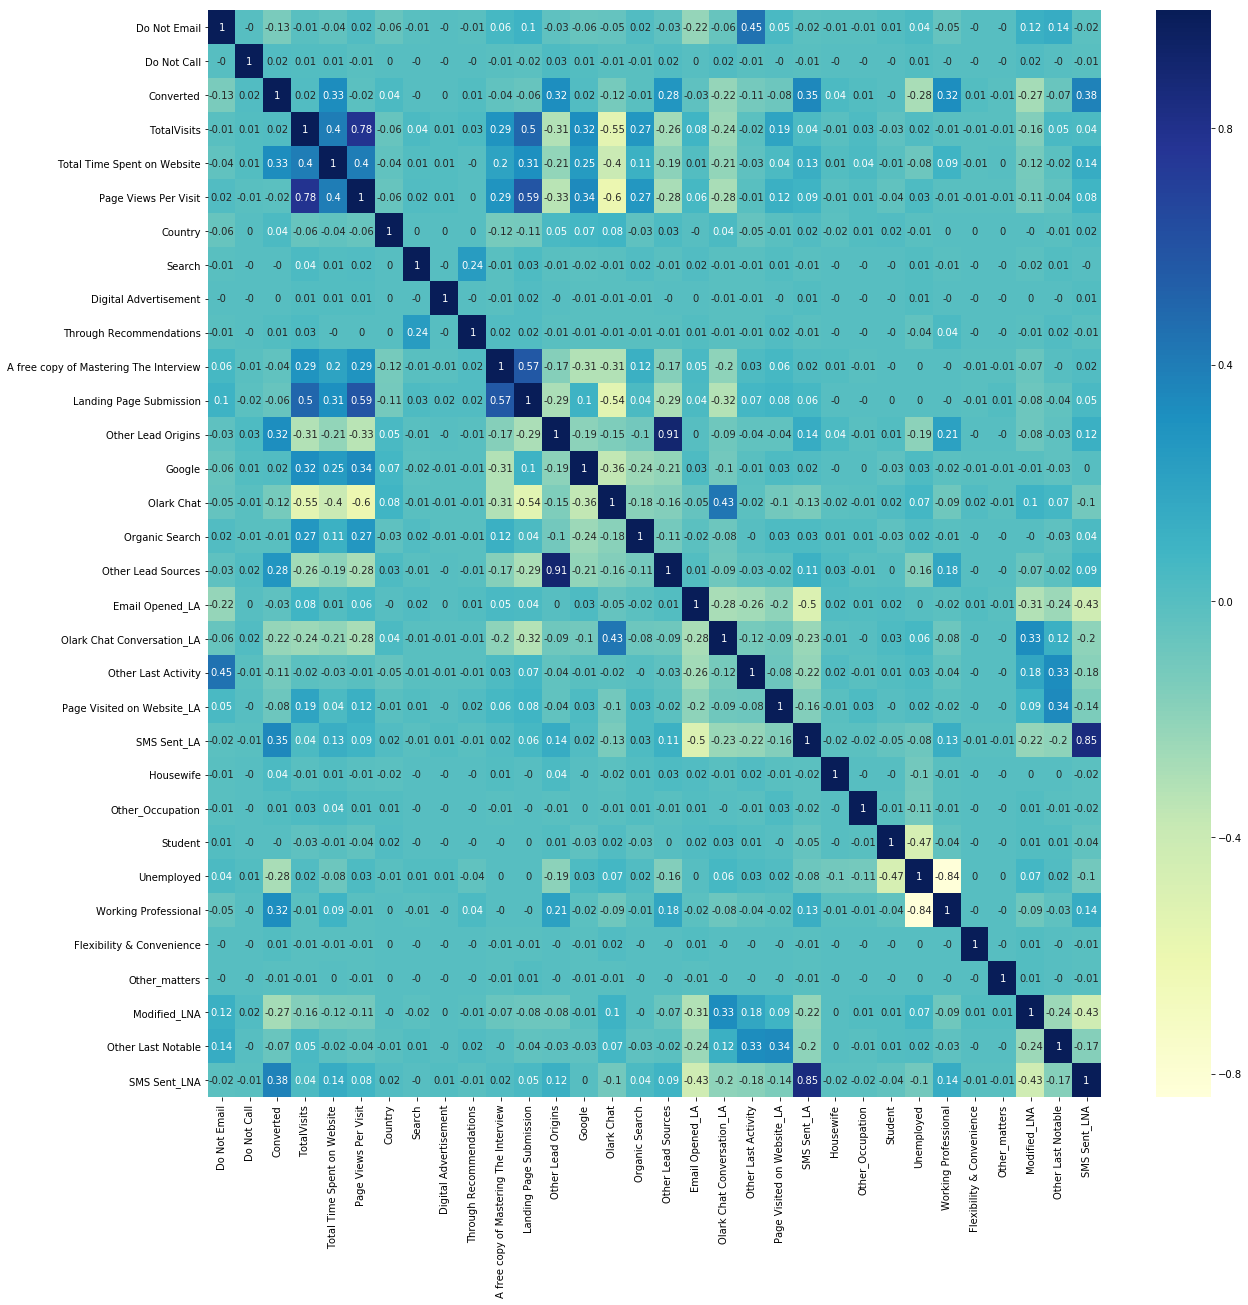

In [35]:
# Heatmap
df_cor = round(df.corr(),2)
plt.figure(figsize=(20,20))
sns.heatmap(df_cor, annot=True, cmap='YlGnBu')
plt.show()

In [36]:
# Splitting the data
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=100)

print(df_train.shape)
print(df_test.shape)

(6421, 32)
(1606, 32)


In [37]:
# X_train and Y_train
y_train = df_train["Converted"]
X_train = df_train.drop('Converted', axis=1)

print(X_train.shape)
print(y_train.shape)

(6421, 31)
(6421,)


In [38]:
# Checking the converted rate
print(round(sum(df['Converted'])/len(df['Converted'])*100,4))

35.9163


In [39]:
# Scaling the dataset
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [40]:
# RFE for feature selection
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 12),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Country', False, 8),
 ('Search', False, 14),
 ('Digital Advertisement', False, 13),
 ('Through Recommendations', False, 9),
 ('A free copy of Mastering The Interview', False, 15),
 ('Landing Page Submission', False, 11),
 ('Other Lead Origins', True, 1),
 ('Google', False, 6),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 16),
 ('Other Lead Sources', False, 4),
 ('Email Opened_LA', True, 1),
 ('Olark Chat Conversation_LA', True, 1),
 ('Other Last Activity', False, 10),
 ('Page Visited on Website_LA', False, 5),
 ('SMS Sent_LA', True, 1),
 ('Housewife', True, 1),
 ('Other_Occupation', False, 3),
 ('Student', True, 1),
 ('Unemployed', True, 1),
 ('Working Professional', True, 1),
 ('Flexibility & Convenience', True, 1),
 ('Other_matters', False, 17),
 ('Modified_LNA', False, 7),
 ('Other Last Notable', False, 2),
 ('S

In [41]:
# Selecting the columns on the basis of RFE
col = X_train.columns[rfe.support_]

# Dataframe of the RFE columns
X1 = X_train[col]

X1.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Other Lead Origins,Olark Chat,Email Opened_LA,Olark Chat Conversation_LA,SMS Sent_LA,Housewife,Student,Unemployed,Working Professional,Flexibility & Convenience,SMS Sent_LNA
3397,0,0.3,0.093488,0.500000,0,0,0,0,0,0,0,1,0,0,0
1271,0,0.6,0.154739,1.000000,0,0,0,0,0,0,0,1,0,0,0
225,0,0.1,0.878143,0.166667,0,0,0,0,0,0,0,1,0,0,0
8085,0,0.0,0.000000,0.000000,1,0,0,0,1,0,0,1,0,0,0
285,0,0.0,0.000000,0.000000,0,1,0,1,0,0,0,1,0,0,0


## Logistic Regression Models

In [42]:
# Logistic Regression Model 1
X1_sm = sm.add_constant(X1)
log1 = sm.GLM(y_train, X1_sm, family=sm.families.Binomial())
res = log1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6405
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.5
Date:                Mon, 07 Oct 2019   Deviance:                       5181.0
Time:                        18:39:44   Pearson chi2:                 6.50e+03
No. Iterations:                    21   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.7689      0.662     -4.186      0.000      -4.066      -1.472
Do Not Email                   -1.2820      0.179     -7.154      0.000      -1.633      -0.931
TotalVisits                     1.3367      0.234      5.702      0.000       0.877       1.796
Total Time Spent on Website     3.5693      0.132     27.027      0.000       3.310       3.828
Page Views Per Visit           -0.5914      0.222     -2.661      0.008      -1.027      -0.156
Other Lead Origins              4.2943      0.207     20.714      0.000       3.888       4.701
Olark Chat                      1.6163      0.139     11.618      0.000       1.344       1.889
Email Opened_LA                 0.5619      0.105      5.352      0.000       0.356       0.768
Olark Chat Conversation_LA     -1.2738      0.193     -6.606      0.000      -1.652      -0.896
SMS Sent_LA                     0.8446      0.158      5.329      0.000       0.534       1.155
Housewife                      23.0089   1.71e+04      0.001      0.999   -3.36e+04    3.36e+04
Student                        -0.1968      0.680     -0.289      0.772      -1.530       1.136
Unemployed                     -0.5113      0.648     -0.789      0.430      -1.781       0.758
Working Professional            2.4105      0.673      3.580      0.000       1.091       3.730
Flexibility & Convenience      23.6681   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
SMS Sent_LNA                    1.2505      0.147      8.501      0.000       0.962       1.539
===============================================================================================
"""

In [43]:
# Model 2
X2 = X1.drop("Flexibility & Convenience", axis=1)
X2_sm = sm.add_constant(X2)
log2 = sm.GLM(y_train, X2_sm, family=sm.families.Binomial())
res2 = log2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6406
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.9
Date:                Mon, 07 Oct 2019   Deviance:                       5183.7
Time:                        18:39:44   Pearson chi2:                 6.50e+03
No. Iterations:                    21   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.7692      0.662     -4.186      0.000      -4.066      -1.473
Do Not Email                   -1.2820      0.179     -7.154      0.000      -1.633      -0.931
TotalVisits                     1.3358      0.234      5.698      0.000       0.876       1.795
Total Time Spent on Website     3.5689      0.132     27.025      0.000       3.310       3.828
Page Views Per Visit           -0.5916      0.222     -2.662      0.008      -1.027      -0.156
Other Lead Origins              4.2935      0.207     20.711      0.000       3.887       4.700
Olark Chat                      1.6201      0.139     11.649      0.000       1.348       1.893
Email Opened_LA                 0.5636      0.105      5.369      0.000       0.358       0.769
Olark Chat Conversation_LA     -1.2764      0.193     -6.620      0.000      -1.654      -0.898
SMS Sent_LA                     0.8446      0.158      5.330      0.000       0.534       1.155
Housewife                      23.0084   1.71e+04      0.001      0.999   -3.36e+04    3.36e+04
Student                        -0.1978      0.680     -0.291      0.771      -1.531       1.135
Unemployed                     -0.5109      0.648     -0.789      0.430      -1.780       0.759
Working Professional            2.4102      0.673      3.579      0.000       1.090       3.730
SMS Sent_LNA                    1.2502      0.147      8.499      0.000       0.962       1.538
===============================================================================================
"""

In [44]:
#Vif
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
11,Unemployed,11.52
3,Page Views Per Visit,8.15
8,SMS Sent_LA,6.42
1,TotalVisits,6.35
14,SMS Sent_LNA,4.84
6,Email Opened_LA,3.22
5,Olark Chat,3.21
2,Total Time Spent on Website,2.39
12,Working Professional,2.10
7,Olark Chat Conversation_LA,1.94


In [45]:
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
11,Unemployed,11.52
3,Page Views Per Visit,8.15
8,SMS Sent_LA,6.42
1,TotalVisits,6.35
13,SMS Sent_LNA,4.84
6,Email Opened_LA,3.22
5,Olark Chat,3.21
2,Total Time Spent on Website,2.39
12,Working Professional,2.10
7,Olark Chat Conversation_LA,1.94


In [46]:
#Model 3
X3 = X2.drop("Housewife", axis=1)
X3_sm = sm.add_constant(X3)
log3 = sm.GLM(y_train, X3_sm, family=sm.families.Binomial())
res3 = log3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6407
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2595.8
Date:                Mon, 07 Oct 2019   Deviance:                       5191.7
Time:                        18:39:45   Pearson chi2:                 6.51e+03
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.8766      0.567     -3.308      0.001      -2.988      -0.765
Do Not Email                   -1.2816      0.179     -7.154      0.000      -1.633      -0.930
TotalVisits                     1.3164      0.234      5.622      0.000       0.857       1.775
Total Time Spent on Website     3.5608      0.132     26.996      0.000       3.302       3.819
Page Views Per Visit           -0.5870      0.222     -2.644      0.008      -1.022      -0.152
Other Lead Origins              4.2881      0.207     20.707      0.000       3.882       4.694
Olark Chat                      1.6107      0.139     11.598      0.000       1.338       1.883
Email Opened_LA                 0.5658      0.105      5.399      0.000       0.360       0.771
Olark Chat Conversation_LA     -1.2826      0.193     -6.648      0.000      -1.661      -0.904
SMS Sent_LA                     0.8425      0.158      5.317      0.000       0.532       1.153
Student                        -1.0822      0.591     -1.831      0.067      -2.241       0.076
Unemployed                     -1.3951      0.554     -2.519      0.012      -2.481      -0.310
Working Professional            1.5248      0.583      2.616      0.009       0.382       2.667
SMS Sent_LNA                    1.2521      0.147      8.510      0.000       0.964       1.540
===============================================================================================
"""

In [47]:
# VIF of Model3
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif["VIF"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
10,Unemployed,11.43
3,Page Views Per Visit,8.13
8,SMS Sent_LA,6.42
1,TotalVisits,6.35
12,SMS Sent_LNA,4.84
6,Email Opened_LA,3.21
5,Olark Chat,3.20
2,Total Time Spent on Website,2.39
11,Working Professional,2.09
7,Olark Chat Conversation_LA,1.93


In [48]:
# Model 4
X4 = X3.drop("Student", axis=1)
X4_sm = sm.add_constant(X4)
log2 = sm.GLM(y_train, X4_sm, family=sm.families.Binomial())
res2 = log2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6408
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.6
Date:                Mon, 07 Oct 2019   Deviance:                       5195.1
Time:                        18:39:45   Pearson chi2:                 6.51e+03
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.8161      0.237    -11.900      0.000      -3.280      -2.352
Do Not Email                   -1.2855      0.179     -7.180      0.000      -1.636      -0.935
TotalVisits                     1.3264      0.234      5.669      0.000       0.868       1.785
Total Time Spent on Website     3.5644      0.132     27.029      0.000       3.306       3.823
Page Views Per Visit           -0.5933      0.222     -2.673      0.008      -1.028      -0.158
Other Lead Origins              4.2888      0.207     20.716      0.000       3.883       4.695
Olark Chat                      1.6085      0.139     11.586      0.000       1.336       1.881
Email Opened_LA                 0.5619      0.105      5.368      0.000       0.357       0.767
Olark Chat Conversation_LA     -1.2832      0.193     -6.659      0.000      -1.661      -0.906
SMS Sent_LA                     0.8406      0.158      5.309      0.000       0.530       1.151
Unemployed                     -0.4536      0.198     -2.287      0.022      -0.842      -0.065
Working Professional            2.4661      0.270      9.138      0.000       1.937       2.995
SMS Sent_LNA                    1.2495      0.147      8.496      0.000       0.961       1.538
===============================================================================================
"""

In [49]:
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif["VIF"] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
9,Unemployed,9.05
3,Page Views Per Visit,7.85
8,SMS Sent_LA,6.35
1,TotalVisits,6.27
11,SMS Sent_LNA,4.84
6,Email Opened_LA,3.04
5,Olark Chat,2.92
2,Total Time Spent on Website,2.33
7,Olark Chat Conversation_LA,1.87
10,Working Professional,1.86


In [50]:
# Model 5
X5 = X4.drop("Unemployed", axis=1)
X5_sm = sm.add_constant(X5)
log5 = sm.GLM(y_train, X5_sm, family=sm.families.Binomial())
res5 = log5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6409
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.1
Date:                Mon, 07 Oct 2019   Deviance:                       5200.2
Time:                        18:39:45   Pearson chi2:                 6.50e+03
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.2508      0.143    -22.695      0.000      -3.532      -2.970
Do Not Email                   -1.2891      0.179     -7.194      0.000      -1.640      -0.938
TotalVisits                     1.3266      0.234      5.670      0.000       0.868       1.785
Total Time Spent on Website     3.5692      0.132     27.088      0.000       3.311       3.827
Page Views Per Visit           -0.6010      0.222     -2.710      0.007      -1.036      -0.166
Other Lead Origins              4.2980      0.207     20.765      0.000       3.892       4.704
Olark Chat                      1.6075      0.139     11.585      0.000       1.336       1.879
Email Opened_LA                 0.5626      0.105      5.377      0.000       0.358       0.768
Olark Chat Conversation_LA     -1.2748      0.192     -6.626      0.000      -1.652      -0.898
SMS Sent_LA                     0.8277      0.158      5.235      0.000       0.518       1.138
Working Professional            2.9044      0.191     15.243      0.000       2.531       3.278
SMS Sent_LNA                    1.2515      0.147      8.514      0.000       0.963       1.540
===============================================================================================
"""

In [51]:
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif["VIF"] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,Page Views Per Visit,6.87
1,TotalVisits,6.02
8,SMS Sent_LA,5.99
10,SMS Sent_LNA,4.83
6,Email Opened_LA,2.59
2,Total Time Spent on Website,2.22
5,Olark Chat,2.12
7,Olark Chat Conversation_LA,1.73
4,Other Lead Origins,1.44
9,Working Professional,1.17


In [52]:
# Model 6
X6 = X5.drop("Page Views Per Visit", axis=1)
X6_sm = sm.add_constant(X6)
log6 = sm.GLM(y_train, X6_sm, family=sm.families.Binomial())
res5 = log6.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6410
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.8
Date:                Mon, 07 Oct 2019   Deviance:                       5207.6
Time:                        18:39:46   Pearson chi2:                 6.51e+03
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.3924      0.134    -25.234      0.000      -3.656      -3.129
Do Not Email                   -1.2968      0.179     -7.254      0.000      -1.647      -0.946
TotalVisits                     1.0009      0.202      4.945      0.000       0.604       1.398
Total Time Spent on Website     3.5729      0.132     27.100      0.000       3.315       3.831
Other Lead Origins              4.4620      0.198     22.481      0.000       4.073       4.851
Olark Chat                      1.7665      0.127     13.961      0.000       1.518       2.014
Email Opened_LA                 0.5423      0.104      5.203      0.000       0.338       0.747
Olark Chat Conversation_LA     -1.2818      0.192     -6.660      0.000      -1.659      -0.905
SMS Sent_LA                     0.7955      0.158      5.049      0.000       0.487       1.104
Working Professional            2.8920      0.190     15.198      0.000       2.519       3.265
SMS Sent_LNA                    1.2454      0.147      8.480      0.000       0.958       1.533
===============================================================================================
"""

In [53]:
vif = pd.DataFrame()
vif['Features'] = X6.columns
vif["VIF"] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
7,SMS Sent_LA,5.75
9,SMS Sent_LNA,4.83
1,TotalVisits,3.00
5,Email Opened_LA,2.34
2,Total Time Spent on Website,2.18
4,Olark Chat,2.00
6,Olark Chat Conversation_LA,1.69
3,Other Lead Origins,1.39
8,Working Professional,1.17
0,Do Not Email,1.09


In [54]:
# Model 7
X8 = X6.drop("SMS Sent_LA", axis=1)
X8_sm = sm.add_constant(X8)
log8 = sm.GLM(y_train, X8_sm, family=sm.families.Binomial())
res8 = log8.fit()
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6411
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2616.3
Date:                Mon, 07 Oct 2019   Deviance:                       5232.7
Time:                        18:39:46   Pearson chi2:                 6.51e+03
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.1607      0.123    -25.774      0.000      -3.401      -2.920
Do Not Email                   -1.3579      0.177     -7.686      0.000      -1.704      -1.012
TotalVisits                     0.9946      0.201      4.953      0.000       0.601       1.388
Total Time Spent on Website     3.5787      0.131     27.224      0.000       3.321       3.836
Other Lead Origins              4.5391      0.198     22.888      0.000       4.150       4.928
Olark Chat                      1.7674      0.126     14.052      0.000       1.521       2.014
Email Opened_LA                 0.3074      0.091      3.391      0.001       0.130       0.485
Olark Chat Conversation_LA     -1.5133      0.186     -8.153      0.000      -1.877      -1.150
Working Professional            2.8691      0.189     15.172      0.000       2.498       3.240
SMS Sent_LNA                    1.8115      0.099     18.345      0.000       1.618       2.005
===============================================================================================
"""

In [55]:
vif = pd.DataFrame()
vif['Features'] = X8.columns
vif["VIF"] = [variance_inflation_factor(X8.values, i) for i in range(X8.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,TotalVisits,2.78
2,Total Time Spent on Website,2.14
5,Email Opened_LA,2.13
4,Olark Chat,1.89
8,SMS Sent_LNA,1.77
6,Olark Chat Conversation_LA,1.63
3,Other Lead Origins,1.30
7,Working Professional,1.17
0,Do Not Email,1.09


In [56]:
# Prediction On Train set
y_train_pred = res8.predict(X8_sm).values.reshape(-1)
y_train_pred

array([0.07393304, 0.11813379, 0.52031814, ..., 0.46346899, 0.07095522,
       0.57104669])

In [57]:
# Predicted values dataset for Train Data
y_train_pred_final = pd.DataFrame()
y_train_pred_final['Converted'] = y_train
y_train_pred_final['Converted_prob'] = y_train_pred
y_train_pred_final["Predicted"] = y_train_pred_final["Converted_prob"].apply(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted
3397,0,0.073933,0
1271,0,0.118134,0
225,1,0.520318,1
8085,1,0.798736,1
285,0,0.051827,0


In [58]:
# Let's check the accuracy
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8205886933499454


In [59]:
# Confusion Matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3660,  440],
       [ 712, 1609]], dtype=int64)

In [60]:
# Checking other metrics
TP = confusion[1,1]
TN = confusion[0,0]
FN = confusion[1,0]
FP = confusion[0,1]

# Sensitivity 
sensi = TP/float(TP+FN)
print("Sensitivity:",sensi)

# Specificity
speci = TN/float(TN+FP)
print("Specificity:", speci)

# False Positive rate
fpr =FP/float(TP+FP)
print("False Positive Rate:", fpr)

#Positive Predicted Values
ppv = TP/float(TP+FP)
print("Positive Predictive Values:", ppv)

# Negetive Predictive Values
npv = TN/float(TN+FN)
print("Negetive Predictive Values:", npv)

Sensitivity: 0.6932356742783283
Specificity: 0.8926829268292683
False Positive Rate: 0.21473889702293802
Positive Predictive Values: 0.785261102977062
Negetive Predictive Values: 0.8371454711802379


In [61]:
# ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return None

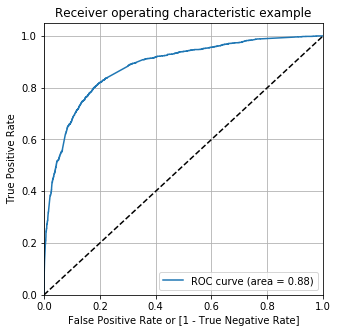

In [62]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [63]:
# Predicttion at different probability
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3397,0,0.073933,0,1,0,0,0,0,0,0,0,0,0
1271,0,0.118134,0,1,1,0,0,0,0,0,0,0,0
225,1,0.520318,1,1,1,1,1,1,1,0,0,0,0
8085,1,0.798736,1,1,1,1,1,1,1,1,1,0,0
285,0,0.051827,0,1,0,0,0,0,0,0,0,0,0


In [64]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.361470,1.000000,0.000000
0.1,0.1,0.613767,0.951745,0.422439
0.2,0.2,0.752064,0.897458,0.669756
0.3,0.3,0.808753,0.814735,0.805366
0.4,0.4,0.818876,0.757863,0.853415
0.5,0.5,0.820589,0.693236,0.892683
0.6,0.6,0.814048,0.621715,0.922927
0.7,0.7,0.789752,0.492891,0.957805
0.8,0.8,0.769974,0.411030,0.973171
0.9,0.9,0.722940,0.247738,0.991951


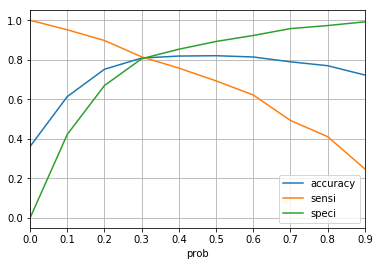

In [65]:

cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.grid(True)
plt.show()


From the graph above we get highest accuracy at 0.45 cutoff

In [66]:
# Final predicted values dataset on the cutoff probability of 0.45
y_train_pred_final = pd.DataFrame()
y_train_pred_final['Converted'] = y_train
y_train_pred_final['Converted_prob'] = y_train_pred
y_train_pred_final["Predicted"] = y_train_pred_final["Converted_prob"].apply(lambda x: 1 if x>0.45 else 0)
y_train_pred_final['Score']=round(y_train_pred_final['Converted_prob'],2)*100
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,Score
3397,0,0.073933,0,7.0
1271,0,0.118134,0,12.0
225,1,0.520318,1,52.0
8085,1,0.798736,1,80.0
285,0,0.051827,0,5.0


In [67]:
# Accuracy on Train set 
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8209001713128796


In [68]:
# Checking Precision and recall
print("Precision:", precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("Recall:", recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Precision: 0.7655328798185941
Recall: 0.7272727272727273


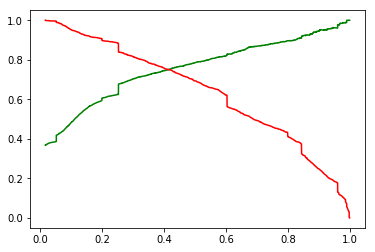

In [69]:
# Precision and Recall to again check optimal cutoff 
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From above diagram we can see 0.45 is optimal cutoff value for the model

## Prediction on Test Set

In [70]:
# Test Set
y_test = df_test['Converted']
X_test = df_test.drop('Converted', axis=1)

In [71]:
# Scaling the features
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [72]:
# Prediction on test cases
X_test_sm = sm.add_constant(X_test[['Do Not Email', 'TotalVisits', 'Total Time Spent on Website','Other Lead Origins','Olark Chat',
                                    'Email Opened_LA', 'Olark Chat Conversation_LA', 'Working Professional','SMS Sent_LNA']])
y_test_pred = res8.predict(X_test_sm)
y_test_pred

2375    0.021140
5128    0.347248
2484    0.278970
2445    0.054639
4014    0.252397
3185    0.798736
946     0.172181
1707    0.051827
4333    0.780880
89      0.387376
4091    0.585364
8817    0.076810
1223    0.746027
6183    0.030159
8544    0.076991
2457    0.960453
497     0.365419
4685    0.176349
2430    0.117629
5095    0.051827
1341    0.141490
7278    0.616137
800     0.458251
3492    0.690947
9214    0.707329
930     0.159112
2344    0.171956
4636    0.105720
381     0.013863
6101    0.819480
          ...   
1724    0.106157
6880    0.015383
8763    0.497757
7897    0.520285
7574    0.427578
8896    0.051827
8223    0.198881
3728    0.053447
6445    0.249393
4335    0.466325
5417    0.134149
6327    0.252397
4913    0.963989
4060    0.173254
790     0.130700
4728    0.204609
1036    0.095939
3408    0.051827
5486    0.252397
1375    0.104055
6604    0.106376
1129    0.960453
1671    0.091777
126     0.059065
1516    0.262174
6900    0.089470
4788    0.997669
6886    0.1865

In [73]:
y_test_pred_final = pd.DataFrame()
y_test_pred_final['Converted'] = y_test
y_test_pred_final['Converted_prob'] = y_test_pred
y_test_pred_final["Final_Predicted"] = y_test_pred_final["Converted_prob"].apply(lambda x: 1 if x>0.45 else 0)
y_test_pred_final = y_test_pred_final.sort_values(by="Converted", ascending=False)
y_test_pred_final['Score']=round(y_test_pred_final['Converted_prob'],2)*100
y_test_pred_final.head()


,Converted,Converted_prob,Final_Predicted,Score
8880,1,0.412285,0,41.0
3919,1,0.960453,1,96.0
1995,1,0.843677,1,84.0
5644,1,0.866072,1,87.0
7035,1,0.114168,0,11.0


In [74]:
# Accuracy on test set
print(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted))

0.813200498132005


In [75]:
# Confusion matrix for test set
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted)
confusion2

array([[918, 126],
       [174, 388]], dtype=int64)

In [76]:
# Metrics for test cases
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 
# Sensititvity 
sensi = TP / float(TP+FN)
print("Sensitivity:", sensi)
# Specificity
speci = TN / float(TN+FP)
print("Specificity:",speci)

Sensitivity: 0.6903914590747331
Specificity: 0.8793103448275862


In [77]:
# Conversion Rate at test cases 
df_result_3=y_test_pred_final[y_test_pred_final['Converted_prob']>=.60]
round(df_result_3['Converted'].sum()/len(df_result_3),2)

0.8

***For Probability of equal or above 0.6 on predicted values we get conversion rate of 80%***